In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('CC GENERAL.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Задание 7.2

Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [5]:
data.isnull().sum().sum()

314

In [8]:
data.isnull().sum().sort_values(ascending=False).iloc[:4]

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
dtype: int64

Задание 7.3

Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [10]:
data = data.fillna({'CREDIT_LIMIT': data['CREDIT_LIMIT'].mean(), 
                    'MINIMUM_PAYMENTS':data['MINIMUM_PAYMENTS'].mean()})

In [12]:
round(data['MINIMUM_PAYMENTS'].mean(),2)

864.21

Задание 7.4

Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [13]:
data = data.drop('CUST_ID', axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data[0][0]

-0.7319893664465486

Задание 7.5

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

<AxesSubplot: xlabel='K', ylabel='Silouhette'>

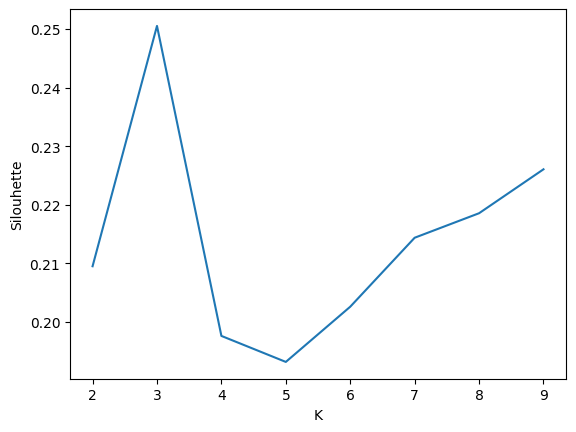

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list = list()
for i in range(2,10):
    kmeans = KMeans(random_state=42, n_clusters=i)
    kmeans.fit(scaled_data)
    sil_list.append([i, silhouette_score(scaled_data,kmeans.labels_)])

sil_df = pd.DataFrame(sil_list, columns=['K','Silouhette'])
sns.lineplot(sil_df, x='K', y='Silouhette')

Задание 7.6

Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [18]:
kmeans = KMeans(random_state=42, n_clusters=3)
kmeans.fit(scaled_data)
pd.Series(kmeans.labels_).value_counts()

c:\Users\killr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    6118
1    1597
2    1235
dtype: int64

Задание 7.7

Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [19]:
from sklearn.cluster import DBSCAN
DBSCAN_model = DBSCAN()
DBSCAN_model.fit(scaled_data)
pd.Series(DBSCAN_model.labels_).value_counts().sort_index()

-1     6627
 0     1698
 1        8
 2       34
 3       11
 4        6
 5      234
 6        9
 7       13
 8       23
 9       14
 10       8
 11      60
 12       7
 13       6
 14       6
 15      23
 16      18
 17      30
 18       5
 19       7
 20       5
 21       7
 22       5
 23       9
 24       5
 25       6
 26       5
 27       5
 28       8
 29       7
 30       5
 31      10
 32       5
 33       5
 34       4
 35       3
 36       4
 37       5
dtype: int64

Задание 7.8

В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [20]:
params = list()
for eps in np.arange(0.1,3,0.2):
    for samles in range(1,20,4):
        DB = DBSCAN(eps=eps, min_samples=samles)
        clusters = DB.fit_predict(scaled_data)
        params.append([eps,samles,silhouette_score(scaled_data,clusters)])

In [23]:
params = pd.DataFrame(params, columns=['eps','min_samples','silhouette'])
piv = pd.pivot_table(params, values='silhouette', index='eps', columns='min_samples', aggfunc='sum')

<AxesSubplot: xlabel='min_samples', ylabel='eps'>

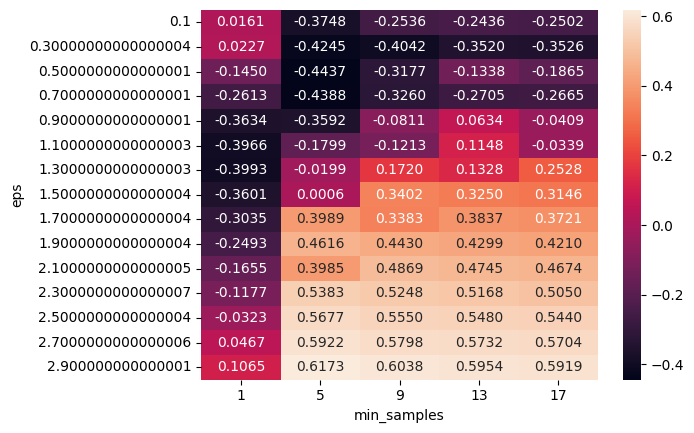

In [26]:
sns.heatmap(piv, annot=True, fmt='.4f')

Задание 7.9

Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

In [27]:
from sklearn.cluster import AgglomerativeClustering

params = list()
for i in range(3,10):
    agc = AgglomerativeClustering(n_clusters=i)
    clusters = agc.fit_predict(scaled_data)
    params.append([i,silhouette_score(scaled_data,clusters)])
    
params = pd.DataFrame(params, columns=['K','silhouette'])
params.sort_values('silhouette', ascending=False).iloc[:2]

,K,silhouette
3,6,0.173356
0,3,0.173110


Задание 7.10

Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [29]:
agc = AgglomerativeClustering(n_clusters=6)
agc.fit(scaled_data)
pd.Series(agc.labels_).value_counts().sort_values(ascending=False)

0    3946
1    2931
2     864
5     722
3     464
4      23
dtype: int64